<a href="https://colab.research.google.com/github/jyns417/Datathon/blob/main/Eunbi_datathon_1004(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# athlete_events = pd.read_csv("athlete_events.csv")
# noc_regions = pd.read_csv("noc_regions.csv")

# 데이터셋 가져오기
athlete_events = pd.read_csv('/content/drive/MyDrive/data/olympic/athlete_events.csv')
noc_regions = pd.read_csv('/content/drive/MyDrive/data/olympic/noc_regions.csv')

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
athlete_events.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [10]:
noc_regions.isnull().sum()

,0
NOC,0
region,3
notes,209


In [11]:
noc_regions[noc_regions['region'].isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [12]:
athlete_events[athlete_events['NOC'] == 'TUV']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
64674,33094,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN
132436,66655,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Featherweight,NaN
148612,74540,Asenate Manoa,F,16.0,NaN,46.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN
148613,74540,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 100 metres,NaN
172492,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,NaN
240317,120422,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,TUV,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,NaN
240342,120439,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN


In [13]:
noc_regions.loc[noc_regions['NOC'] == 'TUV', 'region'] = 'Tuvalu'

In [14]:
athlete_events['NOC'].nunique()

230

In [15]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [16]:
noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  228 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [17]:
athlete_events = athlete_events.merge(noc_regions, on='NOC', how='left')

In [18]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [19]:
athlete_events.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [20]:
athlete_events[athlete_events['region'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,NaN,NaN
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,NaN,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,NaN,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN,Refugee Olympic Team
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26.0,182.0,95.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268753,134454,Zhang Guirong,F,30.0,182.0,95.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268993,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN,NaN,NaN
268994,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore-1,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN,NaN,NaN


In [21]:
athlete_events[athlete_events['region'].isnull()]['NOC'].unique()

array(['SGP', 'ROT', 'UNK'], dtype=object)

In [22]:
athlete_events[(athlete_events['region'].isnull()) & (athlete_events['NOC'] == 'ROT')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN,Refugee Olympic Team
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,Refugee Olympic Team
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN,NaN,Refugee Olympic Team
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN,NaN,Refugee Olympic Team
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,NaN,Refugee Olympic Team
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,NaN,Refugee Olympic Team
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN,NaN,Refugee Olympic Team
141669,71067,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",NaN,NaN,Refugee Olympic Team
141753,71113,Rose Nathike Lokonyen,F,21.0,157.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,NaN,NaN,Refugee Olympic Team
149306,74902,Yusra Mardini,F,18.0,157.0,53.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NaN,NaN,Refugee Olympic Team


In [23]:
athlete_events.loc[athlete_events['NOC'] == 'ROT', 'region'] = 'Refugee Olympic Athletes'

In [24]:
athlete_events[(athlete_events['region'].isnull()) & (athlete_events['NOC'] == 'SGP')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,NaN,NaN
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,NaN,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,NaN,NaN
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,NaN
7660,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26.0,182.0,95.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268753,134454,Zhang Guirong,F,30.0,182.0,95.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN,NaN,NaN
268993,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN,NaN,NaN
268994,134587,Zhang Xueling,F,21.0,163.0,53.0,Singapore-1,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN,NaN,NaN


In [25]:
athlete_events.loc[athlete_events['NOC'] == 'SGP', 'region'] = 'Singapore'

In [26]:
athlete_events[(athlete_events['region'].isnull()) & (athlete_events['NOC'] == 'UNK')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN,Unknown
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN,Unknown


In [27]:
athlete_events = athlete_events[athlete_events['NOC'] != 'UNK']

In [28]:
athlete_events.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9472
Height,60169
Weight,62873
Team,0
NOC,0
Games,0
Year,0


In [29]:
athlete_events['Age'].fillna(athlete_events['Age'].mean(), inplace=True)
athlete_events['Height'].fillna(athlete_events['Height'].mean(), inplace=True)
athlete_events['Weight'].fillna(athlete_events['Weight'].mean(), inplace=True)

In [30]:
athlete_events.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


In [31]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271114 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271114 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271114 non-null  object 
 3   Age     271114 non-null  float64
 4   Height  271114 non-null  float64
 5   Weight  271114 non-null  float64
 6   Team    271114 non-null  object 
 7   NOC     271114 non-null  object 
 8   Games   271114 non-null  object 
 9   Year    271114 non-null  int64  
 10  Season  271114 non-null  object 
 11  City    271114 non-null  object 
 12  Sport   271114 non-null  object 
 13  Event   271114 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  271114 non-null  object 
 16  notes   5037 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [32]:
athlete_events['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [33]:
# Medal 값을 정수로 변환
athlete_events['Medal'] = athlete_events['Medal'].replace({
    'Gold': 3,
    'Silver': 2,
    'Bronze': 1,
    np.nan: 0  # 결측치를 0으로 대체
}).astype(int)

In [34]:
athlete_events['Medal'].unique()
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271114 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271114 non-null  int64  
 1   Name    271114 non-null  object 
 2   Sex     271114 non-null  object 
 3   Age     271114 non-null  float64
 4   Height  271114 non-null  float64
 5   Weight  271114 non-null  float64
 6   Team    271114 non-null  object 
 7   NOC     271114 non-null  object 
 8   Games   271114 non-null  object 
 9   Year    271114 non-null  int64  
 10  Season  271114 non-null  object 
 11  City    271114 non-null  object 
 12  Sport   271114 non-null  object 
 13  Event   271114 non-null  object 
 14  Medal   271114 non-null  int64  
 15  region  271114 non-null  object 
 16  notes   5037 non-null    object 
dtypes: float64(3), int64(3), object(11)
memory usage: 37.2+ MB


## 1. 국가별 메달 수 비교 (2024-10-04)

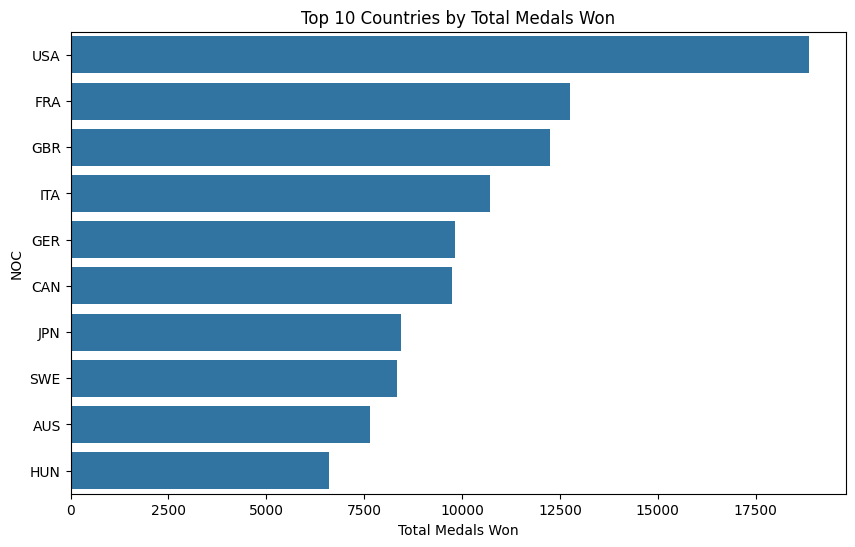

In [35]:
# 메달 획득 여부를 기준으로 국가별 메달 수 분석
medal_counts = athlete_events[athlete_events['Medal'].notna()].groupby('NOC')['Medal'].count().sort_values(ascending=False)

# 상위 10개 국가 시각화
top_10_countries = medal_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index)
plt.title('Top 10 Countries by Total Medals Won')
plt.xlabel('Total Medals Won')
plt.show()


In [38]:
# 메달 획득 여부가 있는 데이터만 필터링
df_medals = athlete_events[athlete_events['Medal'].notna()]

# 동계와 하계 시즌 구분하기 (Season 열이 'Summer' 또는 'Winter'로 구분됨)
summer_medals = df_medals[df_medals['Season'] == 'Summer']
winter_medals = df_medals[df_medals['Season'] == 'Winter']

# 하계 올림픽: 국가별, 종목별 메달 수 집계
summer_medal_counts = summer_medals.groupby(['NOC', 'Sport'])['Medal'].count().reset_index()

# 동계 올림픽: 국가별, 종목별 메달 수 집계
winter_medal_counts = winter_medals.groupby(['NOC', 'Sport'])['Medal'].count().reset_index()

# 결과 출력 (하계 올림픽에서 국가별, 종목별 메달 수)
print("Summer Olympics - Medal Counts by Country and Sport:")
print(summer_medal_counts.head(10))  # 상위 10개만 출력

# 결과 출력 (동계 올림픽에서 국가별, 종목별 메달 수)
print("Winter Olympics - Medal Counts by Country and Sport:")
print(winter_medal_counts.head(10))  # 상위 10개만 출력


Summer Olympics - Medal Counts by Country and Sport:
   NOC          Sport  Medal
0  AFG      Athletics     22
1  AFG         Boxing      5
2  AFG       Football     11
3  AFG         Hockey     39
4  AFG           Judo      3
5  AFG      Taekwondo      4
6  AFG      Wrestling     42
7  AHO      Athletics     14
8  AHO  Equestrianism      2
9  AHO        Fencing      4
Winter Olympics - Medal Counts by Country and Sport:
   NOC                 Sport  Medal
0  AHO             Bobsleigh      4
1  AHO                  Luge      1
2  ALB         Alpine Skiing      7
3  ALG         Alpine Skiing     10
4  ALG  Cross Country Skiing      2
5  AND         Alpine Skiing    105
6  AND              Biathlon      2
7  AND  Cross Country Skiing      7
8  AND          Snowboarding      2
9  ARG         Alpine Skiing    262


In [39]:
# 특정 국가 (예: 'USA')의 하계 올림픽 메달 획득 현황
usa_summer_medals = summer_medal_counts[summer_medal_counts['NOC'] == 'USA']
print("USA Summer Olympics - Medal Counts by Sport:")
print(usa_summer_medals)

# 특정 국가 (예: 'USA')의 동계 올림픽 메달 획득 현황
usa_winter_medals = winter_medal_counts[winter_medal_counts['NOC'] == 'USA']
print("USA Winter Olympics - Medal Counts by Sport:")
print(usa_winter_medals)

USA Summer Olympics - Medal Counts by Sport:
      NOC                  Sport  Medal
3131  USA                Archery    175
3132  USA       Art Competitions    562
3133  USA              Athletics   3211
3134  USA              Badminton     33
3135  USA               Baseball     88
3136  USA             Basketball    341
3137  USA       Beach Volleyball     52
3138  USA                 Boxing    255
3139  USA               Canoeing    311
3140  USA                Cycling    523
3141  USA                 Diving    278
3142  USA          Equestrianism    456
3143  USA                Fencing    690
3144  USA         Figure Skating      5
3145  USA               Football    301
3146  USA                   Golf    116
3147  USA             Gymnastics   2013
3148  USA               Handball    142
3149  USA                 Hockey    182
3150  USA             Ice Hockey     11
3151  USA           Jeu De Paume      2
3152  USA                   Judo    105
3153  USA               Lacrosse   

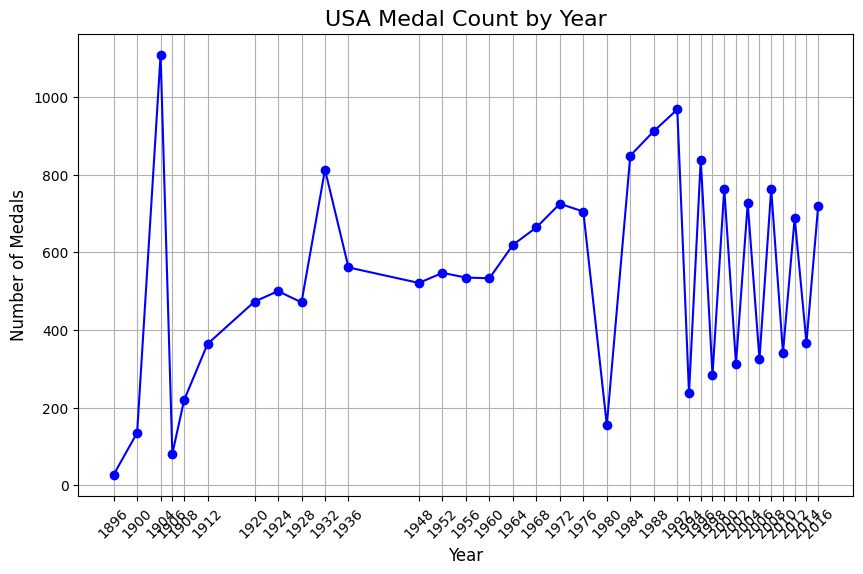

In [42]:
# 메달 획득 데이터만 필터링
athlete_events_medals = athlete_events[athlete_events['Medal'].notna()]

# 연도를 추출하여 새 열 추가 (Games 열에서 연도 추출)
athlete_events_medals['Year'] = athlete_events_medals['Games'].apply(lambda x: int(x.split(' ')[0]))

# 특정 국가의 메달 획득 현황 (예: USA)
country = 'USA'
country_medals = athlete_events_medals[athlete_events_medals['NOC'] == country]

# 연도별 메달 획득 수 집계
medals_by_year = country_medals.groupby('Year')['Medal'].count().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 연도별 메달 획득 수 꺾은선 그래프 그리기
plt.plot(medals_by_year['Year'], medals_by_year['Medal'], marker='o', color='b')

# 그래프 제목 및 레이블 설정
plt.title(f'{country} Medal Count by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# 그래프 축 범위 조정 (필요한 경우)
plt.xticks(medals_by_year['Year'], rotation=45)
plt.grid(True)

# 그래프 출력
plt.show()


<Figure size 1200x800 with 0 Axes>

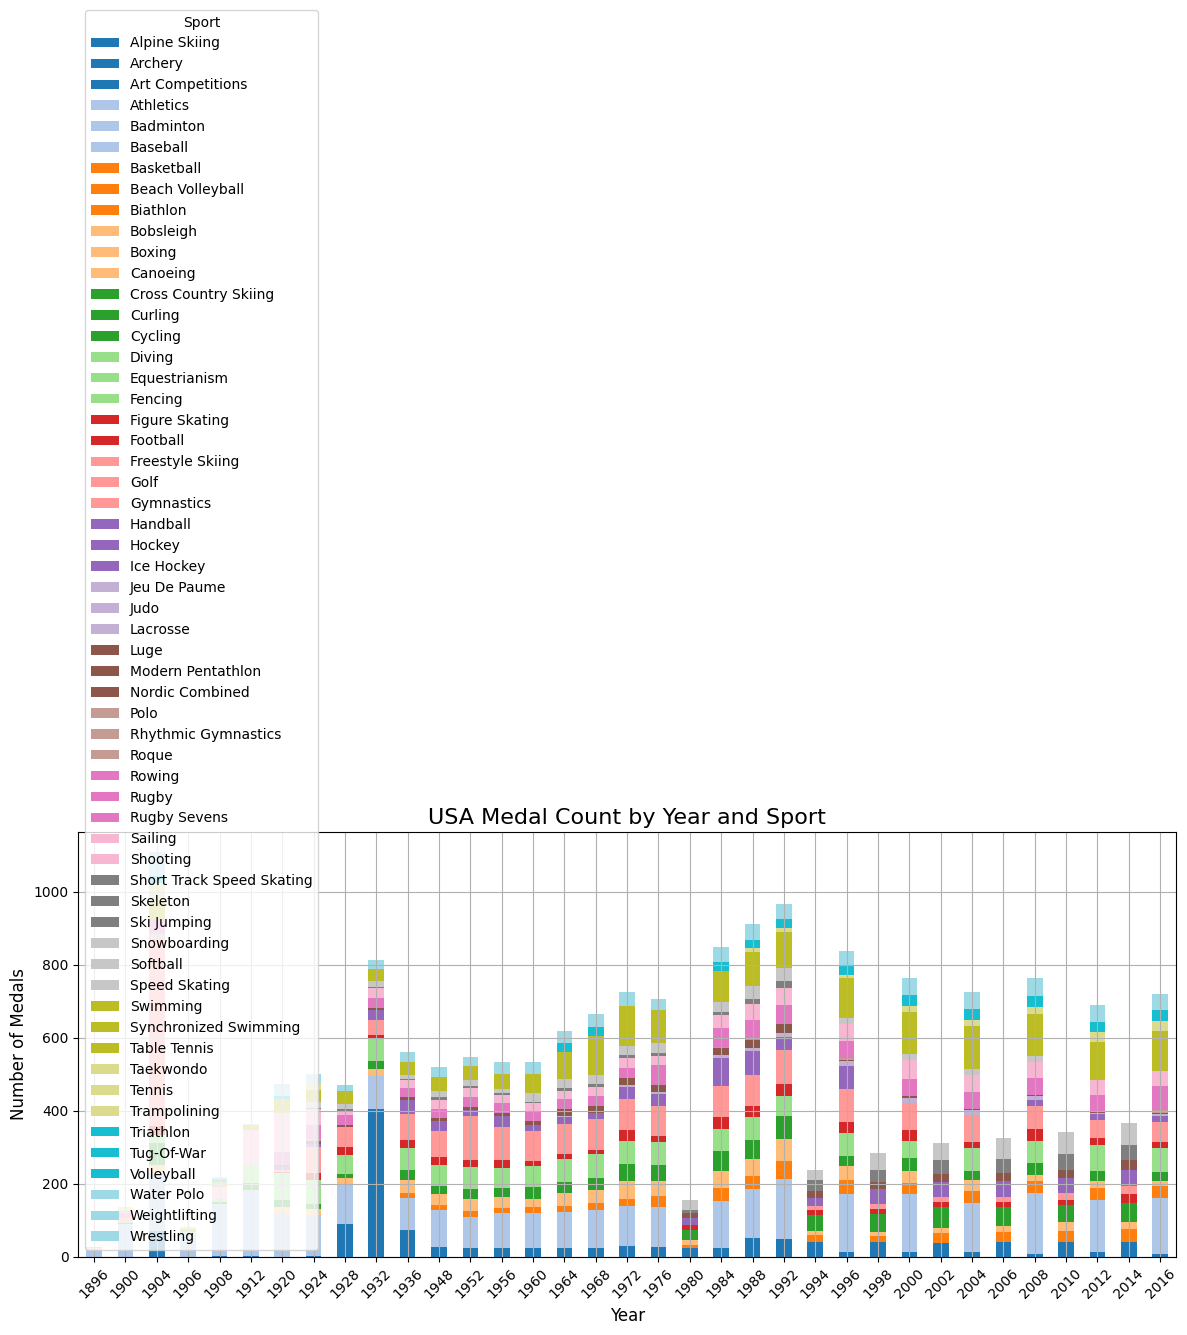

In [46]:
# 메달 획득 데이터만 필터링
athlete_events_medals = athlete_events[athlete_events['Medal'].notna()]

# 연도를 추출하여 새 열 추가 (Games 열에서 연도 추출)
athlete_events_medals['Year'] = athlete_events_medals['Games'].apply(lambda x: int(x.split(' ')[0]))

# 특정 국가의 메달 획득 현황 (예: 'USA')
country = 'USA'
country_medals = athlete_events_medals[athlete_events_medals['NOC'] == country]

# 연도별, 종목별 메달 획득 수 집계
medals_by_year_sport = country_medals.groupby(['Year', 'Sport'])['Medal'].count().unstack(fill_value=0)

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 막대그래프 그리기 (쌓인 막대 형식으로 종목별 표시)
medals_by_year_sport.plot(kind='bar', stacked=True, figsize=(12, 10), colormap='tab20')

# 그래프 제목 및 레이블 설정
plt.title(f'{country} Medal Count by Year and Sport', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# 그래프 축 범위 조정 및 스타일
plt.xticks(rotation=45)
plt.grid(True)

# 그래프 출력
plt.tight_layout()  # 레이블 간 간격 조정
plt.show()


<Figure size 1200x800 with 0 Axes>

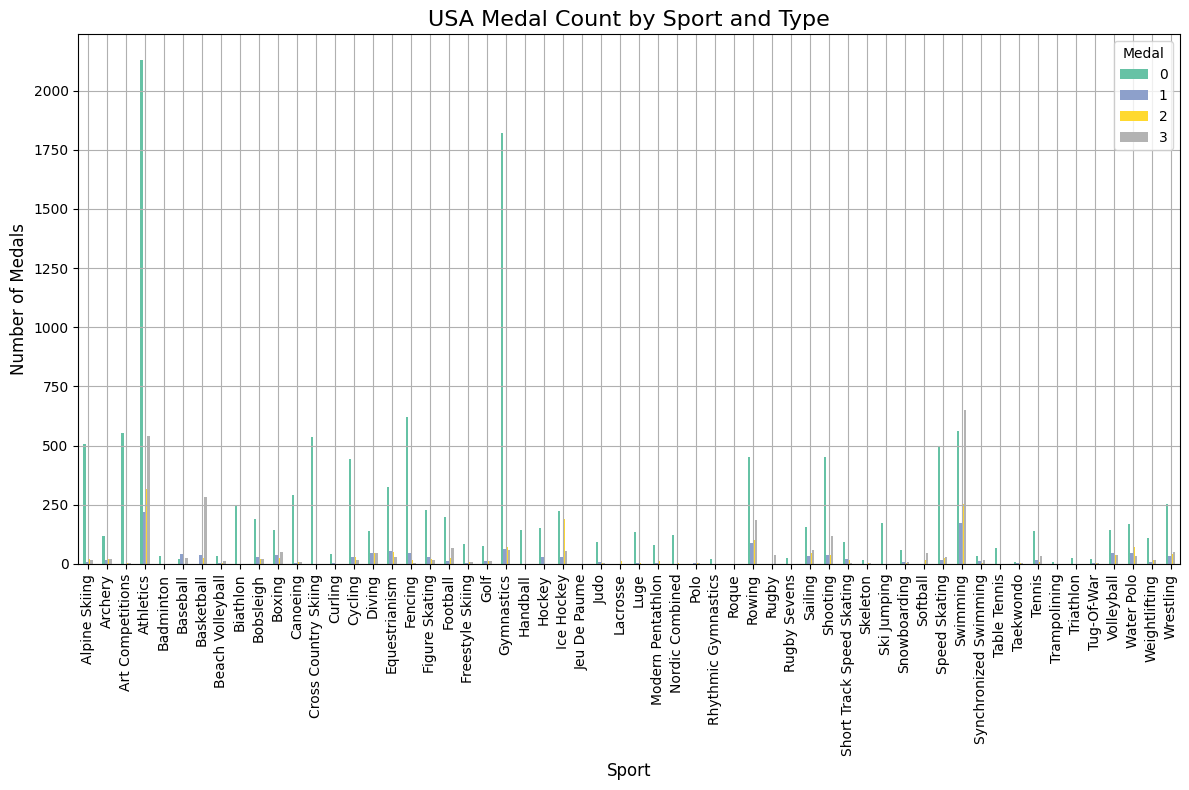

In [48]:
# 메달 획득 데이터만 필터링
athlete_events_medals = athlete_events[athlete_events['Medal'].notna()]

# 특정 국가의 메달 획득 현황 (예: 'USA')
country = 'USA'
country_medals = athlete_events_medals[athlete_events_medals['NOC'] == country]

# 종목별, 메달 종류별 획득 수 집계
medals_by_sport_medal = country_medals.groupby(['Sport', 'Medal'])['Medal'].count().unstack(fill_value=0)

# 메달 수가 0인 항목 제외
medals_by_sport_medal = medals_by_sport_medal[medals_by_sport_medal.sum(axis=1) > 0]

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 막대그래프 그리기 (종목별 메달 종류)
medals_by_sport_medal.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='Set2')

# 그래프 제목 및 레이블 설정
plt.title(f'{country} Medal Count by Sport and Type', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# 그래프 스타일 조정
plt.xticks(rotation=90)
plt.grid(True)

# 그래프 출력
plt.tight_layout()  # 레이블 간격 조정
plt.show()


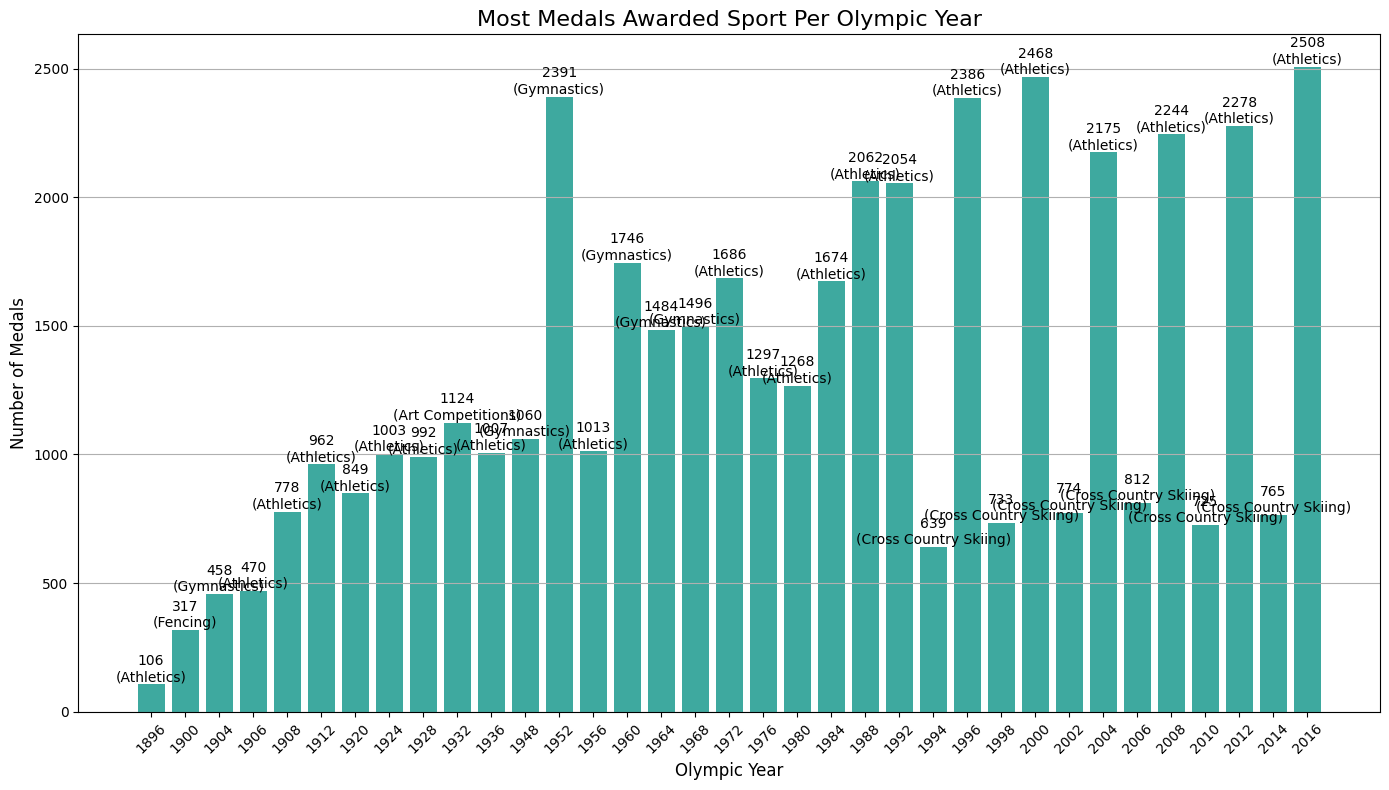

In [61]:
# 메달 획득 데이터만 필터링
athlete_events_medals = athlete_events[athlete_events['Medal'].notna()]

# 올림픽 대회별 종목 및 메달 수 집계
medals_per_olympics = athlete_events_medals.groupby(['Year', 'Sport'])['Medal'].count().reset_index()

# 각 올림픽 대회에서 메달 수가 가장 많은 종목 찾기
max_medals_per_olympics = medals_per_olympics.loc[medals_per_olympics.groupby('Year')['Medal'].idxmax()]

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# 막대그래프 그리기 (각 올림픽 대회에서 메달 수가 가장 많은 종목)
plt.bar(max_medals_per_olympics['Year'].astype(str), max_medals_per_olympics['Medal'], color='#3EA99F')

# 그래프 제목 및 레이블 설정
plt.title('Most Medals Awarded Sport Per Olympic Year', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# 그래프 스타일 조정
plt.xticks(rotation=45)
plt.grid(axis='y')

# 각 막대 위에 메달 수 표시
for index, value in enumerate(max_medals_per_olympics['Medal']):
    sport = max_medals_per_olympics.iloc[index]['Sport']  # 종목 정보 가져오기
    plt.text(index, value, f'{value}\n({sport})', ha='center', va='bottom')

# 그래프 출력
plt.tight_layout()  # 레이블 간격 조정
plt.show()


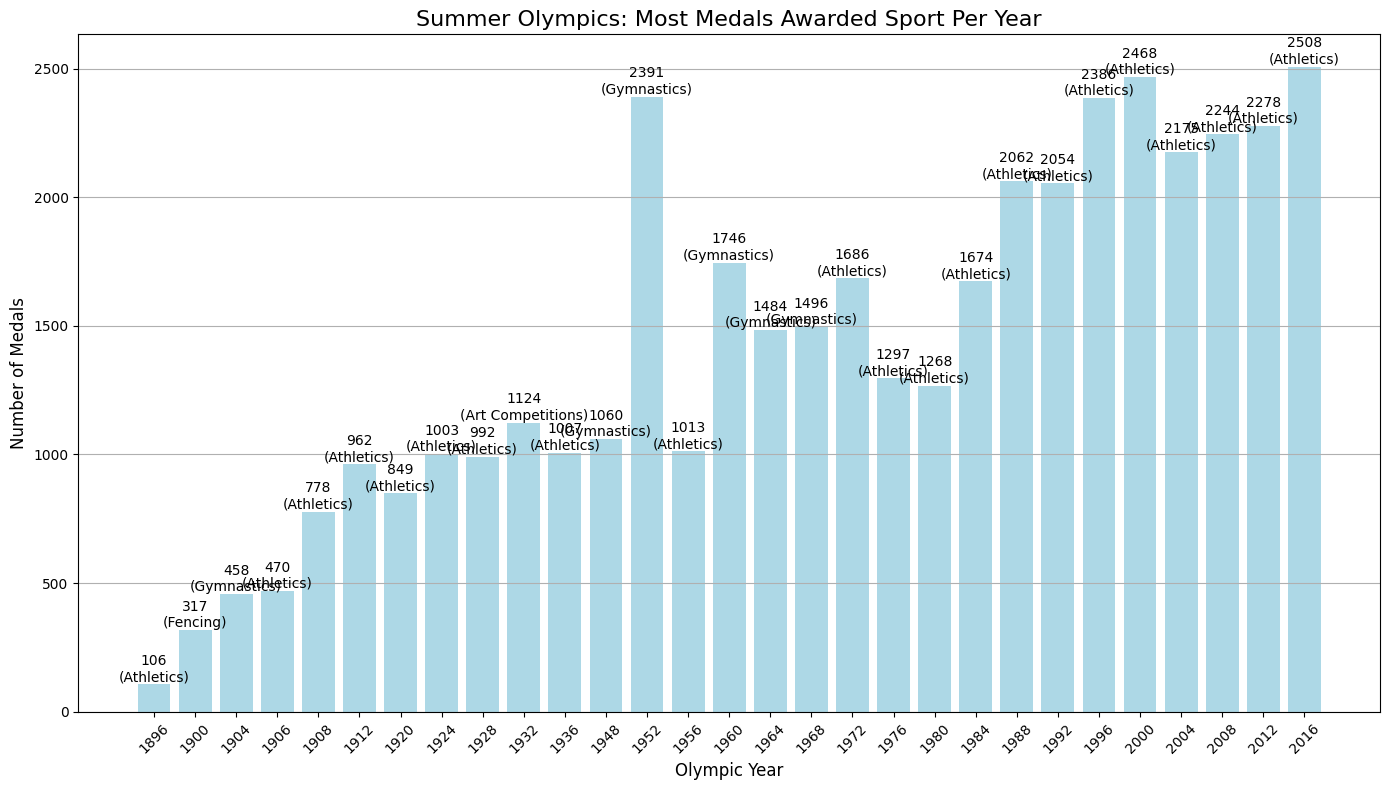

In [64]:
'''
하계 올림픽
'''

# 메달 획득 데이터만 필터링
athlete_events_medals = athlete_events[athlete_events['Medal'].notna()]

# 올림픽 대회별 종목 및 메달 수 집계
medals_per_olympics = athlete_events_medals.groupby(['Year', 'Sport', 'Season'])['Medal'].count().reset_index()

# 하계 올림픽에서 메달 수가 가장 많은 종목 찾기
summer_max_medals = medals_per_olympics[medals_per_olympics['Season'] == 'Summer']
summer_max_medals = summer_max_medals.loc[summer_max_medals.groupby('Year')['Medal'].idxmax()]

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# 하계 올림픽 그래프
plt.bar(summer_max_medals['Year'].astype(str), summer_max_medals['Medal'], color='lightblue')
plt.title('Summer Olympics: Most Medals Awarded Sport Per Year', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# 각 막대 위에 메달 수와 종목 이름 표시
for index, value in enumerate(summer_max_medals['Medal']):
    sport = summer_max_medals.iloc[index]['Sport']
    plt.text(index, value, f'{value}\n({sport})', ha='center', va='bottom')

# 그래프 간격 조정 및 출력
plt.tight_layout()
plt.show()


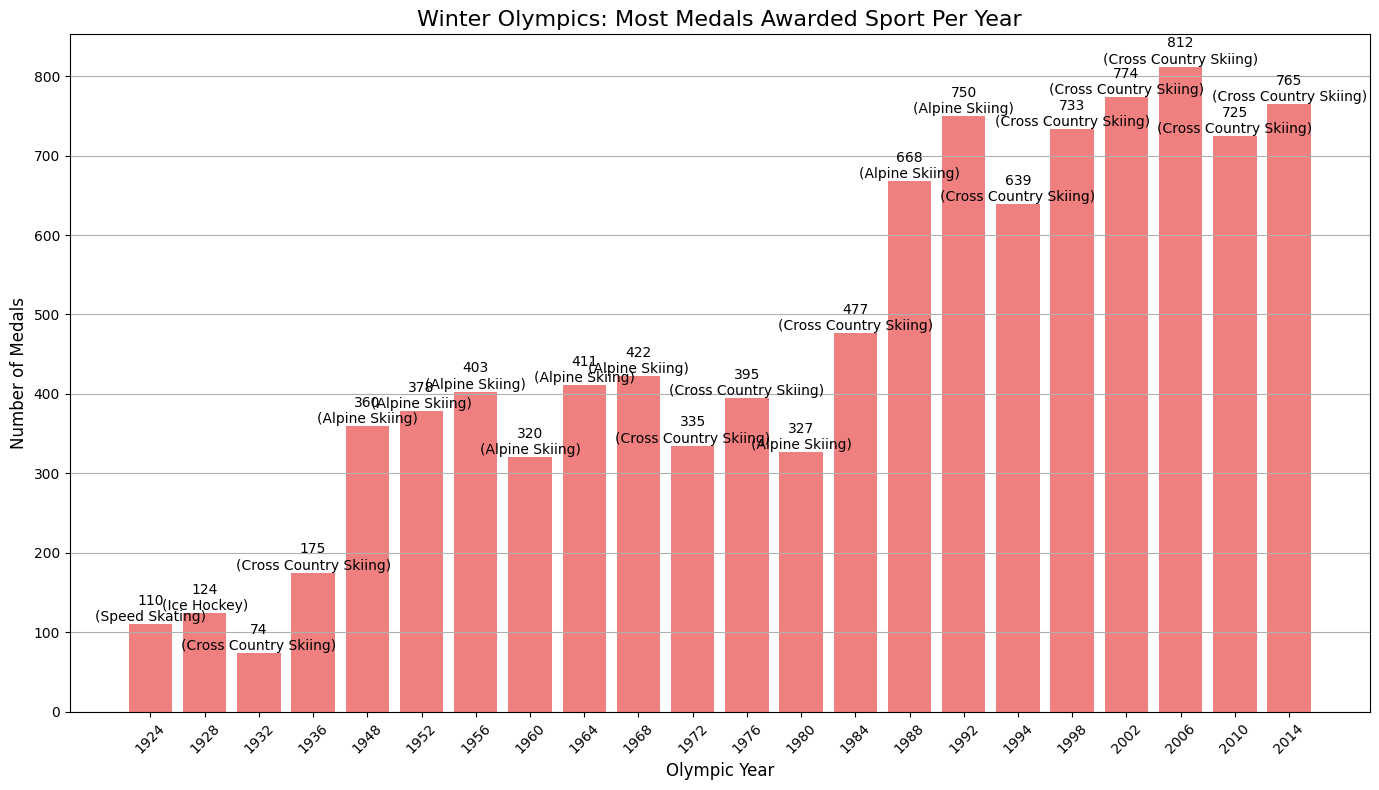

In [65]:
'''
동계 올림픽
'''

# 메달 획득 데이터만 필터링
athlete_events_medals = athlete_events[athlete_events['Medal'].notna()]

# 올림픽 대회별 종목 및 메달 수 집계
medals_per_olympics = athlete_events_medals.groupby(['Year', 'Sport', 'Season'])['Medal'].count().reset_index()

# 동계 올림픽에서 메달 수가 가장 많은 종목 찾기
winter_max_medals = medals_per_olympics[medals_per_olympics['Season'] == 'Winter']
winter_max_medals = winter_max_medals.loc[winter_max_medals.groupby('Year')['Medal'].idxmax()]

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# 동계 올림픽 그래프
plt.bar(winter_max_medals['Year'].astype(str), winter_max_medals['Medal'], color='lightcoral')
plt.title('Winter Olympics: Most Medals Awarded Sport Per Year', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# 각 막대 위에 메달 수와 종목 이름 표시
for index, value in enumerate(winter_max_medals['Medal']):
    sport = winter_max_medals.iloc[index]['Sport']
    plt.text(index, value, f'{value}\n({sport})', ha='center', va='bottom')

# 그래프 간격 조정 및 출력
plt.tight_layout()
plt.show()


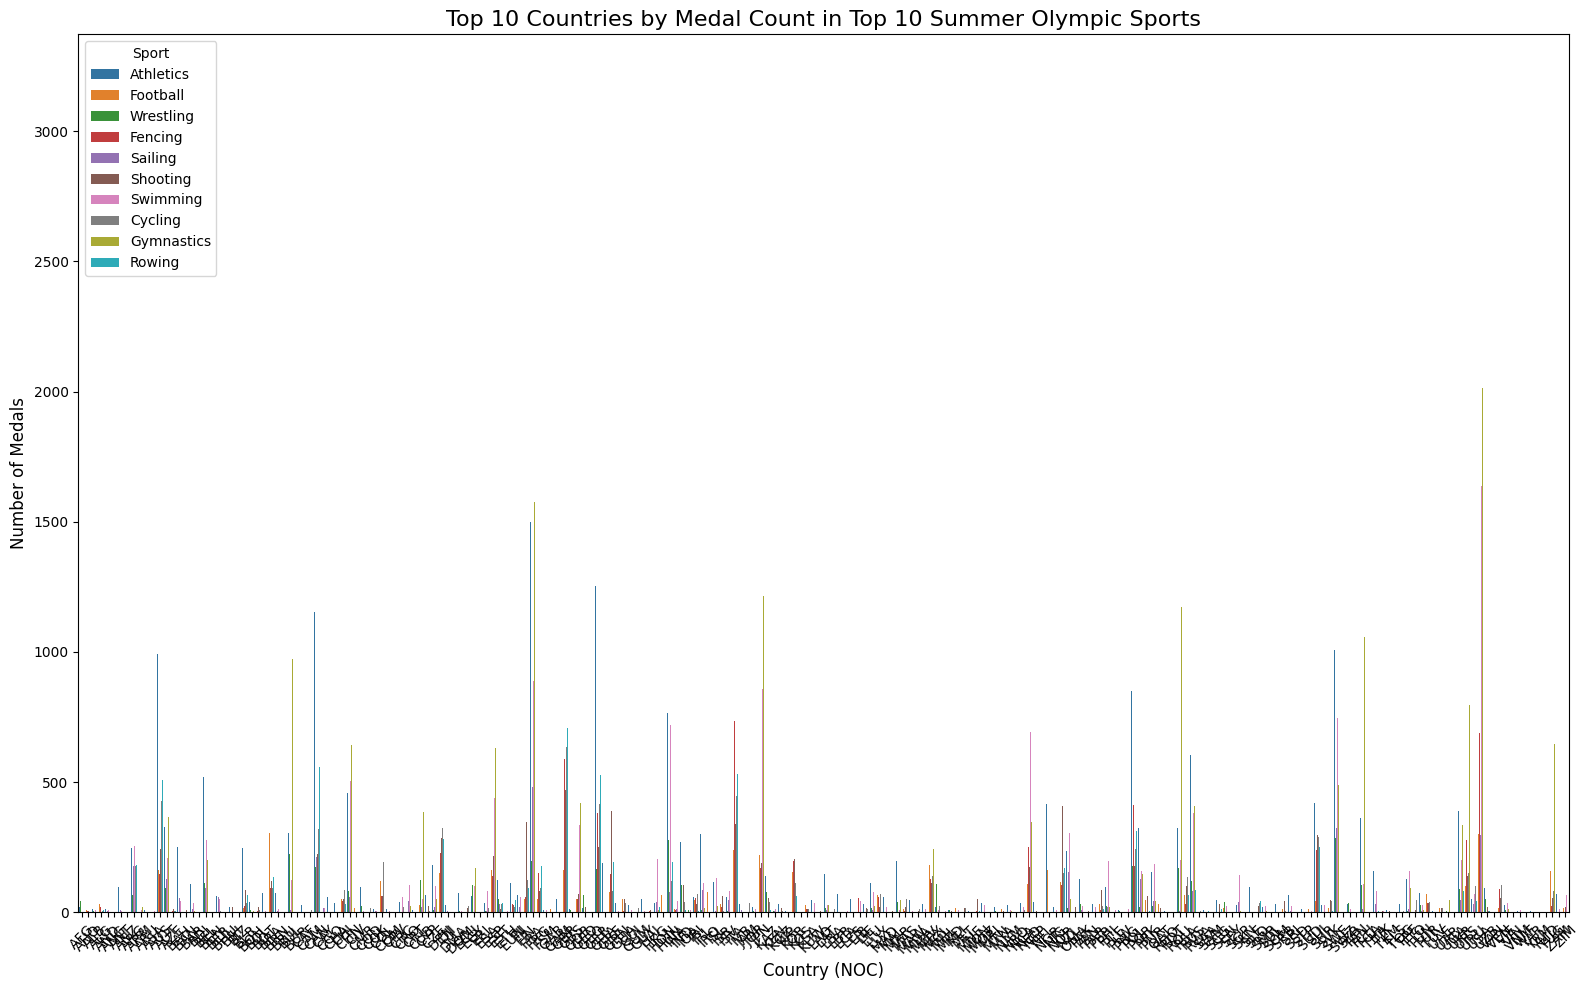

In [86]:
'''
< 하계 올림픽 >
메달 수 많은 국가 및 종목 중심 분석
1. 국가별 종목 매달 집중 수(상위 10개 종목, 상위 10개 국가)
- 종목별 매달 수 상위 10개 종목
- 각 종목별로 메달 획득 수 상위 10개 국가 선택
'''

# 하계 올림픽 데이터 필터링
athlete_events_summer = athlete_events_medals[df_medals['Season'] == 'Summer']

# 국가별 종목에서 메달 집중도 계산
medals_summer = athlete_events_summer.groupby(['NOC', 'Sport'])['Medal'].count().reset_index()

# 종목별 메달 수 상위 10개 종목 선택
top_sports_summer = medals_summer.groupby('Sport')['Medal'].sum().nlargest(10).index

# 상위 10개 종목에 대한 데이터만 필터링
top_summer_medals = medals_summer[medals_summer['Sport'].isin(top_sports_summer)]

# 각 종목별로 메달 획득 수 상위 10개 국가 선택
top_country_per_sport = top_country_medals.groupby('Sport').apply(lambda x: x.nlargest(10, 'Medal')).reset_index(drop=True)

# 시각화: 각 종목별 상위 10개 국가에서 메달 집중도
plt.figure(figsize=(16, 10))
sns.barplot(x='NOC', y='Medal', hue='Sport', data=top_summer_medals, ci=None)

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Countries by Medal Count in Top 10 Summer Olympic Sports', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()




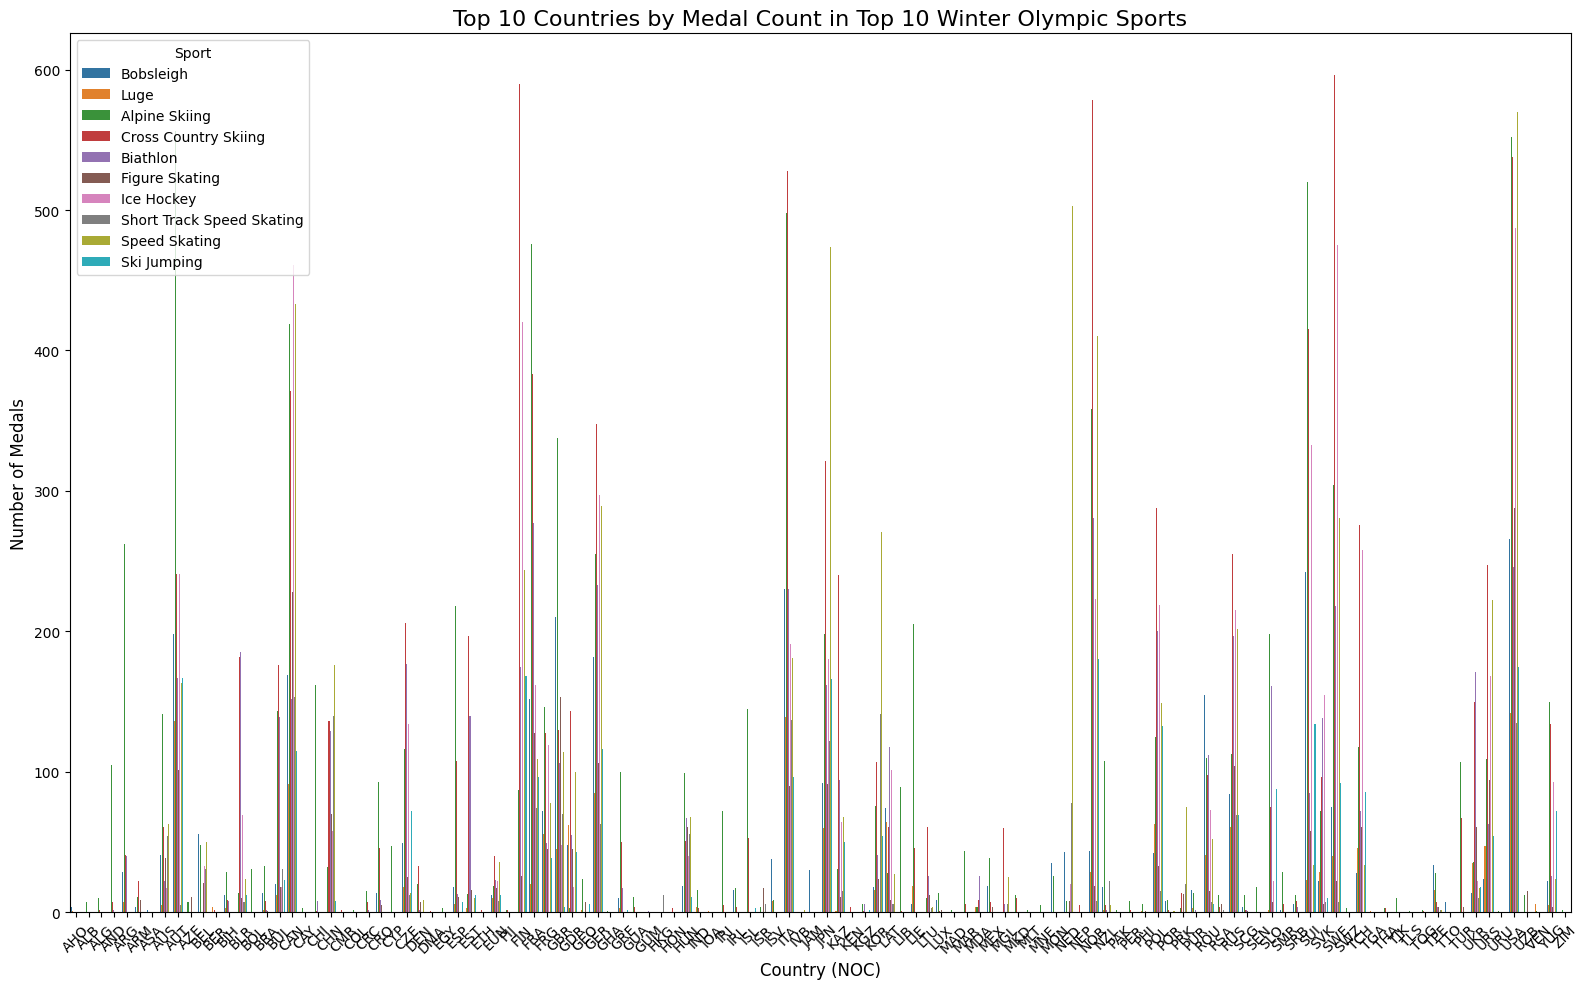

In [87]:
'''
< 동계 올림픽 >
메달 수 많은 국가 및 종목 중심 분석
1. 국가별 종목 매달 집중 수(상위 10개 종목, 상위 10개 국가)
- 종목별 매달 수 상위 10개 종목
- 각 종목별로 메달 획득 수 상위 10개 국가 선택
'''

# 동계 올림픽 데이터만 필터링
athlete_events_winter = athlete_events_medals[athlete_events_medals['Season'] == 'Winter']

# 국가별 종목에서 메달 집중도 계산
medals_winter = athlete_events_winter.groupby(['NOC', 'Sport'])['Medal'].count().reset_index()

# 종목별 메달 수 상위 10개 종목 선택
top_sports_winter = medals_winter.groupby('Sport')['Medal'].sum().nlargest(10).index

# 상위 10개 종목에 대한 데이터만 필터링
top_winter_medals = medals_winter[medals_winter['Sport'].isin(top_sports_winter)]

# 각 종목별로 메달 획득 수 상위 10개 국가 선택
top_country_per_sport = top_country_medals.groupby('Sport').apply(lambda x: x.nlargest(10, 'Medal')).reset_index(drop=True)

# 시각화: 각 종목별 상위 10개 국가에서 메달 집중도
plt.figure(figsize=(16, 10))
sns.barplot(x='NOC', y='Medal', hue='Sport', data=top_winter_medals, ci=None)

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Countries by Medal Count in Top 10 Winter Olympic Sports', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()



In [91]:
'''
국가별 메달 수가 가장 많았던 올림픽 연도
'''

# 하계 올림픽 데이터 필터링
athlete_events_summer = athlete_events_medals[athlete_events_medals['Season'] == 'Summer']

# 동계 올림픽 데이터 필터링
athlete_events_winter = athlete_events_medals[athlete_events_medals['Season'] == 'Winter']

# 1. 하계 올림픽: 국가별 올림픽 연도별 메달 획득 수 계산
medals_per_country_year_summer = athlete_events_summer.groupby(['NOC', 'Year'])['Medal'].count().reset_index()

# 2. 하계 올림픽에서 국가별로 가장 많은 메달을 획득한 올림픽 연도 찾기
max_medals_per_country_summer = medals_per_country_year_summer.loc[medals_per_country_year_summer.groupby('NOC')['Medal'].idxmax()]

# 3. 동계 올림픽: 국가별 올림픽 연도별 메달 획득 수 계산
medals_per_country_year_winter = athlete_events_winter.groupby(['NOC', 'Year'])['Medal'].count().reset_index()

# 4. 동계 올림픽에서 국가별로 가장 많은 메달을 획득한 올림픽 연도 찾기
max_medals_per_country_winter = medals_per_country_year_winter.loc[medals_per_country_year_winter.groupby('NOC')['Medal'].idxmax()]

# 결과 출력
print("Summer Olympics:\n", max_medals_per_country_summer)
print("\nWinter Olympics:\n", max_medals_per_country_winter)


Summer Olympics:
       NOC  Year  Medal
1     AFG  1948     25
20    AHO  1984     13
32    ALB  2008     12
47    ALG  2016     74
52    AND  1992      8
...   ...   ...    ...
2759  YEM  1992      8
2766  YMD  1988      5
2778  YUG  1972    212
2786  ZAM  1980     43
2799  ZIM  1980     52

[229 rows x 3 columns]

Winter Olympics:
       NOC  Year  Medal
0     AHO  1988      3
2     ALB  2006      3
5     ALG  1992      8
17    AND  2010     20
30    ARG  1992     46
...   ...   ...    ...
1001  USA  2014    367
1002  UZB  1994      7
1009  VEN  2002      4
1023  YUG  1984    115
1026  ZIM  2014      2

[119 rows x 3 columns]


In [97]:
# 메달 획득 데이터만 필터링
athlete_events_medals = athlete_events[athlete_events['Medal'].notna()]

# 각 올림픽 연도별 국가별 메달 획득 수 계산
medals_per_country_year = athlete_events_medals.groupby(['NOC', 'Year'])['Medal'].count().reset_index()

# 메달 획득 수를 이전 올림픽과 비교하기 위해 데이터를 피벗
medals_pivot = medals_per_country_year.pivot(index='NOC', columns='Year', values='Medal').fillna(0)

# 메달 수 증가를 확인하기 위한 빈 데이터프레임 생성
increased_countries_list = []

# 유효한 연도 범위를 확인하여 이전 연도와 비교
years = medals_pivot.columns.tolist()

# 각 연도에 대해 이전 연도와 비교하여 메달 수가 증가한 국가 찾기
for i in range(1, len(years)):
    year = years[i]
    previous_year = years[i - 1]

    # 메달 수 증가 계산
    medals_pivot['Increase'] = medals_pivot[year] - medals_pivot[previous_year]

    # 메달 수가 증가한 국가를 필터링
    increased_countries = medals_pivot[medals_pivot['Increase'] > 0].reset_index()
    increased_countries['Year'] = year  # 증가가 발생한 연도 추가
    increased_countries_list.append(increased_countries[['NOC', previous_year, year, 'Increase', 'Year']])

# 모든 결과를 하나의 데이터프레임으로 통합
increased_countries_all = pd.concat(increased_countries_list, ignore_index=True)

# 결과 출력
print("Countries with Increased Medals Across All Years:\n", increased_countries_all)



Countries with Increased Medals Across All Years:
 Year  NOC  1896   1900  Increase  Year  1904  1906  1908  1912  1920  ...  \
0     ARG   0.0    1.0       1.0  1900   NaN   NaN   NaN   NaN   NaN  ...   
1     AUS   5.0    6.0       1.0  1900   NaN   NaN   NaN   NaN   NaN  ...   
2     AUT   8.0   26.0      18.0  1900   NaN   NaN   NaN   NaN   NaN  ...   
3     BEL   0.0  100.0     100.0  1900   NaN   NaN   NaN   NaN   NaN  ...   
4     BOH   0.0    9.0       9.0  1900   NaN   NaN   NaN   NaN   NaN  ...   
...   ...   ...    ...       ...   ...   ...   ...   ...   ...   ...  ...   
2247  VIE   NaN    NaN      28.0  2016   NaN   NaN   NaN   NaN   NaN  ...   
2248  VIN   NaN    NaN       4.0  2016   NaN   NaN   NaN   NaN   NaN  ...   
2249  YEM   NaN    NaN       3.0  2016   NaN   NaN   NaN   NaN   NaN  ...   
2250  ZAM   NaN    NaN       7.0  2016   NaN   NaN   NaN   NaN   NaN  ...   
2251  ZIM   NaN    NaN      29.0  2016   NaN   NaN   NaN   NaN   NaN  ...   

Year  1998  2000  2002  

In [98]:
# 각 올림픽 연도, 종목별 국가별 메달 획득 수 계산
medals_per_country_year_sport = athlete_events_medals.groupby(['NOC', 'Year', 'Sport'])['Medal'].count().reset_index()

# 메달 획득 수를 이전 올림픽과 비교하기 위해 데이터를 피벗
medals_pivot = medals_per_country_year_sport.pivot_table(index=['NOC', 'Sport'], columns='Year', values='Medal', fill_value=0)

# 메달 수 증가를 확인하기 위한 빈 데이터프레임 생성
increased_countries_list = []

# 유효한 연도 범위를 확인하여 이전 연도와 비교
years = medals_pivot.columns.tolist()

# 각 연도에 대해 이전 연도와 비교하여 메달 수가 증가한 국가 찾기
for i in range(1, len(years)):
    year = years[i]
    previous_year = years[i - 1]

    # 메달 수 증가 계산
    medals_pivot['Increase'] = medals_pivot[year] - medals_pivot[previous_year]

    # 메달 수가 증가한 국가를 필터링
    increased_countries = medals_pivot[medals_pivot['Increase'] > 0].reset_index()
    increased_countries['Year'] = year  # 증가가 발생한 연도 추가
    increased_countries_list.append(increased_countries[['NOC', 'Sport', previous_year, year, 'Increase', 'Year']])

# 모든 결과를 하나의 데이터프레임으로 통합
increased_countries_all = pd.concat(increased_countries_list, ignore_index=True)

# 결과 출력
print("Countries with Increased Medals Across All Years by Sport:\n", increased_countries_all)


Countries with Increased Medals Across All Years by Sport:
 Year   NOC          Sport  1896  1900  Increase  Year  1904  1906  1908  1912  \
0      ARG        Fencing   0.0   1.0       1.0  1900   NaN   NaN   NaN   NaN   
1      AUS      Athletics   3.0   4.0       1.0  1900   NaN   NaN   NaN   NaN   
2      AUS       Swimming   0.0   2.0       2.0  1900   NaN   NaN   NaN   NaN   
3      AUT      Athletics   0.0   3.0       3.0  1900   NaN   NaN   NaN   NaN   
4      AUT  Equestrianism   0.0   6.0       6.0  1900   NaN   NaN   NaN   NaN   
...    ...            ...   ...   ...       ...   ...   ...   ...   ...   ...   
21150  ZIM  Equestrianism   NaN   NaN       1.0  2016   NaN   NaN   NaN   NaN   
21151  ZIM       Football   NaN   NaN      17.0  2016   NaN   NaN   NaN   NaN   
21152  ZIM         Rowing   NaN   NaN       2.0  2016   NaN   NaN   NaN   NaN   
21153  ZIM       Shooting   NaN   NaN       1.0  2016   NaN   NaN   NaN   NaN   
21154  ZIM       Swimming   NaN   NaN       3.0  

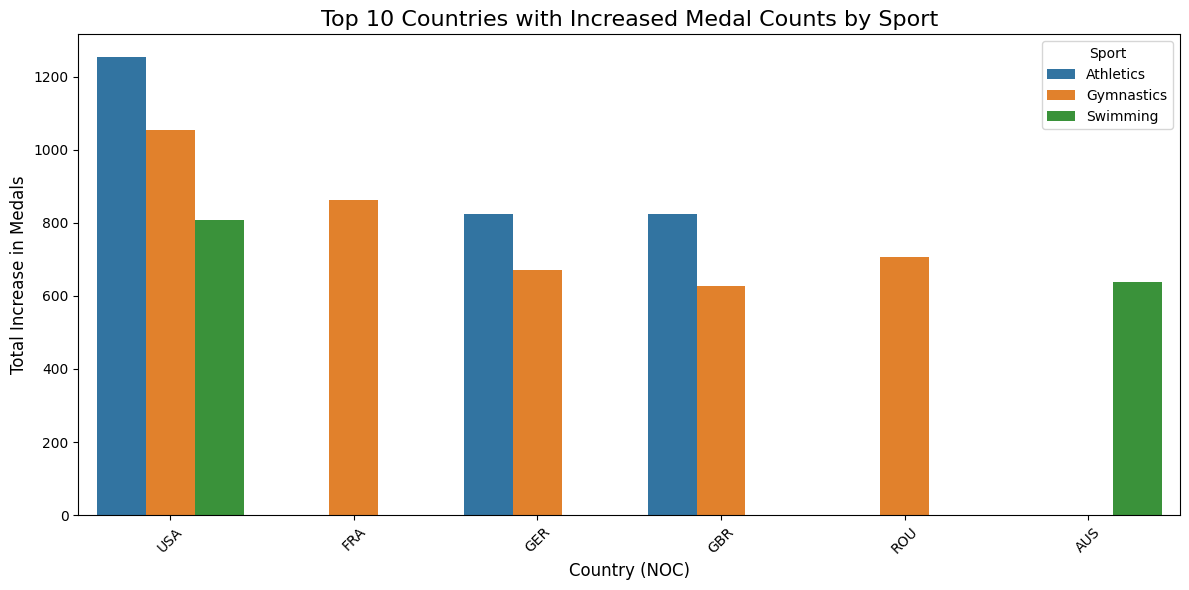

In [99]:
'''
종목별로 메달 수 증가한 국가 확인
'''

# 각 종목별로 메달 수 증가한 국가의 총 증가량 계산
top_increased_countries = increased_countries_all.groupby(['NOC', 'Sport'])['Increase'].sum().reset_index()

# 메달 수 증가한 국가 시각화 (상위 10개 국가)
top_increased_countries = top_increased_countries.sort_values(by='Increase', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='NOC', y='Increase', hue='Sport', data=top_increased_countries, ci=None)

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Countries with Increased Medal Counts by Sport', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Total Increase in Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sport')
plt.tight_layout()

# 그래프 출력
plt.show()


In [100]:
'''
종목별로 메달 수 증가한 국가 확인
'''

# 동계 및 하계 올림픽 데이터 분리
athlete_events_summer = athlete_events_medals[athlete_events_medals['Season'] == 'Summer']
athlete_events_winter = athlete_events_medals[athlete_events_medals['Season'] == 'Winter']

# 각 올림픽 연도, 종목별 국가별 메달 획득 수 계산 (하계)
medals_per_country_year_sport_summer = athlete_events_summer.groupby(['NOC', 'Year', 'Sport'])['Medal'].count().reset_index()

# 각 올림픽 연도, 종목별 국가별 메달 획득 수 계산 (동계)
medals_per_country_year_sport_winter = athlete_events_winter.groupby(['NOC', 'Year', 'Sport'])['Medal'].count().reset_index()

# 메달 획득 수를 이전 올림픽과 비교하기 위해 데이터를 피벗 (하계)
medals_pivot_summer = medals_per_country_year_sport_summer.pivot_table(index=['NOC', 'Sport'], columns='Year', values='Medal', fill_value=0)

# 메달 획득 수를 이전 올림픽과 비교하기 위해 데이터를 피벗 (동계)
medals_pivot_winter = medals_per_country_year_sport_winter.pivot_table(index=['NOC', 'Sport'], columns='Year', values='Medal', fill_value=0)

# 메달 수 증가를 확인하기 위한 빈 데이터프레임 생성
increased_countries_list_summer = []
increased_countries_list_winter = []

# 유효한 연도 범위를 확인하여 이전 연도와 비교 (하계)
years_summer = medals_pivot_summer.columns.tolist()
for i in range(1, len(years_summer)):
    year = years_summer[i]
    previous_year = years_summer[i - 1]

    # 메달 수 증가 계산
    medals_pivot_summer['Increase'] = medals_pivot_summer[year] - medals_pivot_summer[previous_year]

    # 메달 수가 증가한 국가를 필터링
    increased_countries_summer = medals_pivot_summer[medals_pivot_summer['Increase'] > 0].reset_index()
    increased_countries_summer['Year'] = year  # 증가가 발생한 연도 추가
    increased_countries_list_summer.append(increased_countries_summer[['NOC', 'Sport', previous_year, year, 'Increase', 'Year']])

# 유효한 연도 범위를 확인하여 이전 연도와 비교 (동계)
years_winter = medals_pivot_winter.columns.tolist()
for i in range(1, len(years_winter)):
    year = years_winter[i]
    previous_year = years_winter[i - 1]

    # 메달 수 증가 계산
    medals_pivot_winter['Increase'] = medals_pivot_winter[year] - medals_pivot_winter[previous_year]

    # 메달 수가 증가한 국가를 필터링
    increased_countries_winter = medals_pivot_winter[medals_pivot_winter['Increase'] > 0].reset_index()
    increased_countries_winter['Year'] = year  # 증가가 발생한 연도 추가
    increased_countries_list_winter.append(increased_countries_winter[['NOC', 'Sport', previous_year, year, 'Increase', 'Year']])

# 모든 결과를 하나의 데이터프레임으로 통합 (하계)
increased_countries_all_summer = pd.concat(increased_countries_list_summer, ignore_index=True)

# 모든 결과를 하나의 데이터프레임으로 통합 (동계)
increased_countries_all_winter = pd.concat(increased_countries_list_winter, ignore_index=True)

# 결과 출력
print("Countries with Increased Medals Across All Years by Sport (Summer):\n", increased_countries_all_summer)
print("Countries with Increased Medals Across All Years by Sport (Winter):\n", increased_countries_all_winter)


Countries with Increased Medals Across All Years by Sport (Summer):
 Year   NOC          Sport  1896  1900  Increase  Year  1904  1906  1908  1912  \
0      ARG        Fencing   0.0   1.0       1.0  1900   NaN   NaN   NaN   NaN   
1      AUS      Athletics   3.0   4.0       1.0  1900   NaN   NaN   NaN   NaN   
2      AUS       Swimming   0.0   2.0       2.0  1900   NaN   NaN   NaN   NaN   
3      AUT      Athletics   0.0   3.0       3.0  1900   NaN   NaN   NaN   NaN   
4      AUT  Equestrianism   0.0   6.0       6.0  1900   NaN   NaN   NaN   NaN   
...    ...            ...   ...   ...       ...   ...   ...   ...   ...   ...   
12200  ZIM        Archery   NaN   NaN       1.0  2016   NaN   NaN   NaN   NaN   
12201  ZIM      Athletics   NaN   NaN       3.0  2016   NaN   NaN   NaN   NaN   
12202  ZIM  Equestrianism   NaN   NaN       1.0  2016   NaN   NaN   NaN   NaN   
12203  ZIM       Football   NaN   NaN      17.0  2016   NaN   NaN   NaN   NaN   
12204  ZIM       Shooting   NaN   NaN   

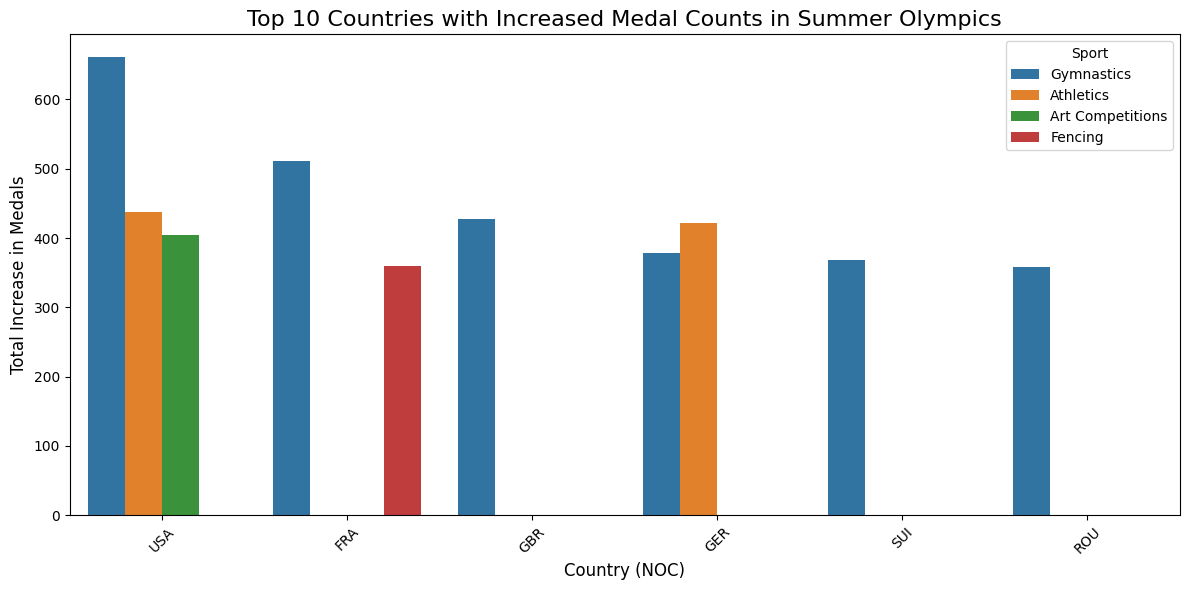

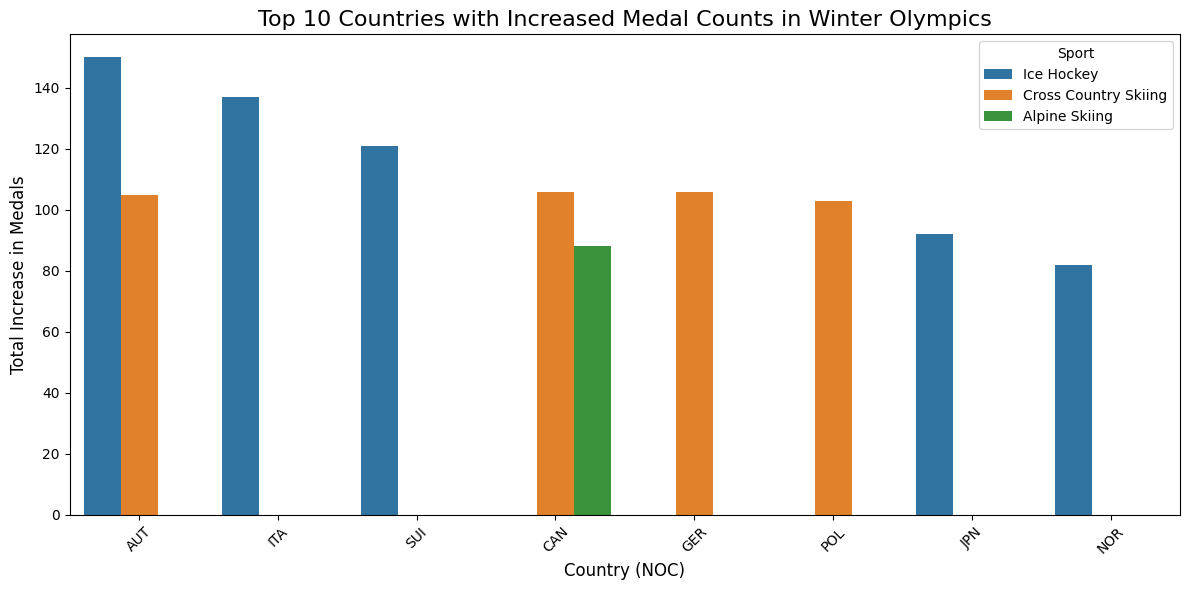

In [101]:
# 하계 종목에서 메달 수 증가한 국가의 총 증가량 계산
top_increased_countries_summer = increased_countries_all_summer.groupby(['NOC', 'Sport'])['Increase'].sum().reset_index()

# 동계 종목에서 메달 수 증가한 국가의 총 증가량 계산
top_increased_countries_winter = increased_countries_all_winter.groupby(['NOC', 'Sport'])['Increase'].sum().reset_index()

# 하계 메달 수 증가한 국가 시각화 (상위 10개 국가)
top_increased_countries_summer = top_increased_countries_summer.sort_values(by='Increase', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='NOC', y='Increase', hue='Sport', data=top_increased_countries_summer, ci=None)

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Countries with Increased Medal Counts in Summer Olympics', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Total Increase in Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sport')
plt.tight_layout()

# 그래프 출력
plt.show()

# 동계 메달 수 증가한 국가 시각화 (상위 10개 국가)
top_increased_countries_winter = top_increased_countries_winter.sort_values(by='Increase', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='NOC', y='Increase', hue='Sport', data=top_increased_countries_winter, ci=None)

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Countries with Increased Medal Counts in Winter Olympics', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Total Increase in Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sport')
plt.tight_layout()

# 그래프 출력
plt.show()


In [108]:
'''
버전2. (1988년부터 최근까지) 종목별로 메달 수 증가한 국가 확인
'''
# 최근 10년의 연도 계산 (가장 최근 연도 기준)
recent_years = athlete_events['Year'].max()
recent_year_range = range(1988, 2017)  # 2006년부터 2016년까지 포함

# 최근 10년의 데이터 필터링 (하계)
athlete_events_summer_recent = athlete_events_summer[athlete_events_summer['Year'].isin(recent_year_range)]

# 최근 10년의 데이터 필터링 (동계)
athlete_events_winter_recent = athlete_events_winter[athlete_events_winter['Year'].isin(recent_year_range)]

# 각 올림픽 연도, 종목별 국가별 메달 획득 수 계산 (하계)
medals_per_country_year_sport_summer = athlete_events_summer_recent.groupby(['NOC', 'Year', 'Sport'])['Medal'].count().reset_index()

# 각 올림픽 연도, 종목별 국가별 메달 획득 수 계산 (동계)
medals_per_country_year_sport_winter = athlete_events_winter_recent.groupby(['NOC', 'Year', 'Sport'])['Medal'].count().reset_index()

# 메달 획득 수를 이전 올림픽과 비교하기 위해 데이터를 피벗 (하계)
medals_pivot_summer = medals_per_country_year_sport_summer.pivot_table(index=['NOC', 'Sport'], columns='Year', values='Medal', fill_value=0)

# 메달 획득 수를 이전 올림픽과 비교하기 위해 데이터를 피벗 (동계)
medals_pivot_winter = medals_per_country_year_sport_winter.pivot_table(index=['NOC', 'Sport'], columns='Year', values='Medal', fill_value=0)

# 메달 수 증가를 확인하기 위한 빈 데이터프레임 생성
increased_countries_list_summer = []
increased_countries_list_winter = []

# 유효한 연도 범위를 확인하여 이전 연도와 비교 (하계)
years_summer = medals_pivot_summer.columns.tolist()
for i in range(1, len(years_summer)):
    year = years_summer[i]
    previous_year = years_summer[i - 1]

    # 메달 수 증가 계산
    medals_pivot_summer['Increase'] = medals_pivot_summer[year] - medals_pivot_summer[previous_year]

    # 메달 수가 증가한 국가를 필터링
    increased_countries_summer = medals_pivot_summer[medals_pivot_summer['Increase'] > 0].reset_index()
    increased_countries_summer['Year'] = year  # 증가가 발생한 연도 추가
    increased_countries_list_summer.append(increased_countries_summer[['NOC', 'Sport', previous_year, year, 'Increase', 'Year']])

# 유효한 연도 범위를 확인하여 이전 연도와 비교 (동계)
years_winter = medals_pivot_winter.columns.tolist()
for i in range(1, len(years_winter)):
    year = years_winter[i]
    previous_year = years_winter[i - 1]

    # 메달 수 증가 계산
    medals_pivot_winter['Increase'] = medals_pivot_winter[year] - medals_pivot_winter[previous_year]

    # 메달 수가 증가한 국가를 필터링
    increased_countries_winter = medals_pivot_winter[medals_pivot_winter['Increase'] > 0].reset_index()
    increased_countries_winter['Year'] = year  # 증가가 발생한 연도 추가
    increased_countries_list_winter.append(increased_countries_winter[['NOC', 'Sport', previous_year, year, 'Increase', 'Year']])

# 모든 결과를 하나의 데이터프레임으로 통합 (하계)
increased_countries_all_summer = pd.concat(increased_countries_list_summer, ignore_index=True)

# 모든 결과를 하나의 데이터프레임으로 통합 (동계)
increased_countries_all_winter = pd.concat(increased_countries_list_winter, ignore_index=True)

# 결과 출력
print("Countries with Increased Medals Across the Last 10 Years by Sport (Summer):\n", increased_countries_all_summer)
print("Countries with Increased Medals Across the Last 10 Years by Sport (Winter):\n", increased_countries_all_winter)




Countries with Increased Medals Across the Last 10 Years by Sport (Summer):
 Year  NOC          Sport  1988  1992  Increase  Year  1996  2000  2004  2008  \
0     AHO      Athletics   0.0   1.0       1.0  1992   NaN   NaN   NaN   NaN   
1     AHO        Sailing   1.0   2.0       1.0  1992   NaN   NaN   NaN   NaN   
2     ALB      Athletics   0.0   1.0       1.0  1992   NaN   NaN   NaN   NaN   
3     ALB       Shooting   0.0   2.0       2.0  1992   NaN   NaN   NaN   NaN   
4     ALB       Swimming   0.0   3.0       3.0  1992   NaN   NaN   NaN   NaN   
...   ...            ...   ...   ...       ...   ...   ...   ...   ...   ...   
5547  ZIM        Archery   NaN   NaN       1.0  2016   NaN   NaN   NaN   NaN   
5548  ZIM      Athletics   NaN   NaN       3.0  2016   NaN   NaN   NaN   NaN   
5549  ZIM  Equestrianism   NaN   NaN       1.0  2016   NaN   NaN   NaN   NaN   
5550  ZIM       Football   NaN   NaN      17.0  2016   NaN   NaN   NaN   NaN   
5551  ZIM       Shooting   NaN   NaN       

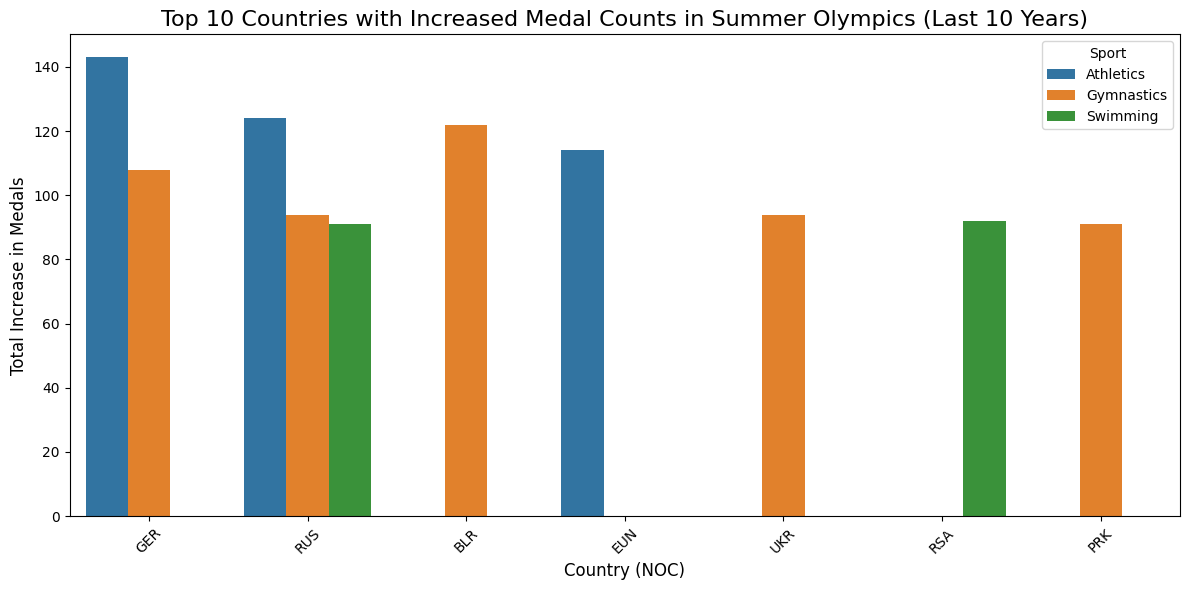

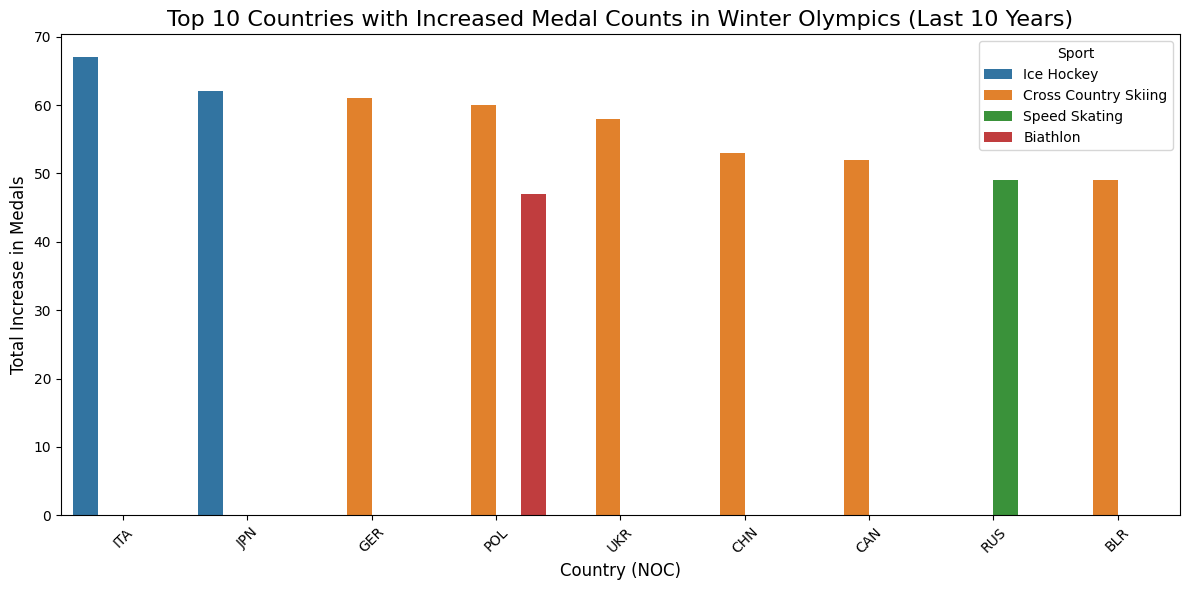

In [109]:
# 하계 종목에서 메달 수 증가한 국가의 총 증가량 계산
top_increased_countries_summer = increased_countries_all_summer.groupby(['NOC', 'Sport'])['Increase'].sum().reset_index()

# 동계 종목에서 메달 수 증가한 국가의 총 증가량 계산
top_increased_countries_winter = increased_countries_all_winter.groupby(['NOC', 'Sport'])['Increase'].sum().reset_index()

# 하계 메달 수 증가한 국가 시각화 (상위 10개 국가)
top_increased_countries_summer = top_increased_countries_summer.sort_values(by='Increase', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='NOC', y='Increase', hue='Sport', data=top_increased_countries_summer, ci=None)

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Countries with Increased Medal Counts in Summer Olympics (Last 10 Years)', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Total Increase in Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sport')
plt.tight_layout()

# 그래프 출력
plt.show()

# 동계 메달 수 증가한 국가 시각화 (상위 10개 국가)
top_increased_countries_winter = top_increased_countries_winter.sort_values(by='Increase', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='NOC', y='Increase', hue='Sport', data=top_increased_countries_winter, ci=None)

# 그래프 제목 및 레이블 설정
plt.title('Top 10 Countries with Increased Medal Counts in Winter Olympics (Last 10 Years)', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Total Increase in Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sport')
plt.tight_layout()

# 그래프 출력
plt.show()


In [112]:
# 특정 국가 (예: 'KOR')의 하계 올림픽 메달 획득 현황
kor_summer_medals = summer_medal_counts[summer_medal_counts['NOC'] == 'KOR']
print("KOR Summer Olympics - Medal Counts by Sport:")
print(kor_summer_medals)

# 특정 국가 (예: 'USA')의 동계 올림픽 메달 획득 현황
kor_winter_medals = winter_medal_counts[winter_medal_counts['NOC'] == 'KOR']
print("KOR Winter Olympics - Medal Counts by Sport:")
print(kor_winter_medals)

KOR Summer Olympics - Medal Counts by Sport:
      NOC                  Sport  Medal
1735  KOR                Archery    102
1736  KOR              Athletics    243
1737  KOR              Badminton    112
1738  KOR               Baseball     68
1739  KOR             Basketball    134
1740  KOR                 Boxing    110
1741  KOR               Canoeing     48
1742  KOR                Cycling    113
1743  KOR                 Diving     27
1744  KOR          Equestrianism     54
1745  KOR                Fencing    198
1746  KOR               Football    156
1747  KOR                   Golf      6
1748  KOR             Gymnastics    512
1749  KOR               Handball    228
1750  KOR                 Hockey    225
1751  KOR                   Judo    119
1752  KOR      Modern Pentathlon     31
1753  KOR    Rhythmic Gymnastics      7
1754  KOR                 Rowing     64
1755  KOR                Sailing     40
1756  KOR               Shooting    206
1757  KOR               Swimming   

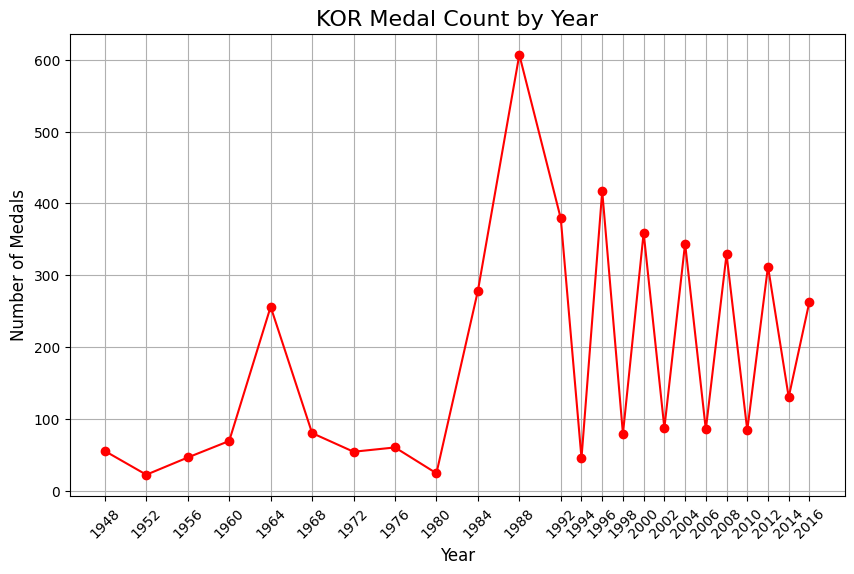

In [114]:
# 메달 획득 데이터만 필터링
athlete_events_medals = athlete_events[athlete_events['Medal'].notna()]

# 연도를 추출하여 새 열 추가 (Games 열에서 연도 추출)
athlete_events_medals['Year'] = athlete_events_medals['Games'].apply(lambda x: int(x.split(' ')[0]))

# 특정 국가의 메달 획득 현황 (예: KOR)
country = 'KOR'
country_medals = athlete_events_medals[athlete_events_medals['NOC'] == country]

# 연도별 메달 획득 수 집계
medals_by_year = country_medals.groupby('Year')['Medal'].count().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 연도별 메달 획득 수 꺾은선 그래프 그리기
plt.plot(medals_by_year['Year'], medals_by_year['Medal'], marker='o', color='r')

# 그래프 제목 및 레이블 설정
plt.title(f'{country} Medal Count by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# 그래프 축 범위 조정 (필요한 경우)
plt.xticks(medals_by_year['Year'], rotation=45)
plt.grid(True)

# 그래프 출력
plt.show()

In [115]:
# 한국 데이터 필터링
korea_data = athlete_events[athlete_events['NOC'] == 'KOR']

# 메달 데이터만 필터링
korea_medals = korea_data[korea_data['Medal'].notna()]

# 연도별 종목별 메달 수 계산
medals_by_sport_year = korea_medals.groupby(['Year', 'Sport']).size().unstack(fill_value=0)

# 결과 출력
print(medals_by_sport_year)


Sport  Alpine Skiing  Archery  Athletics  Badminton  Baseball  Basketball  \
Year                                                                        
1948               0        0         11          0         0           9   
1952               0        0          6          0         0           0   
1956               0        0          8          0         0          10   
1960               3        0          6          0         0           0   
1964               4        0         24          0         0          12   
1968               2        0          4          0         0          11   
1972               0        0          2          0         0           0   
1976               0        0          0          0         0           0   
1980               3        0          0          0         0           0   
1984               9        6         12          0         0          11   
1988              12       12         59          0         0          24   

In [116]:
# 1984년과 1988년의 메달 수 가져오기
medals_1984 = medals_by_sport_year.loc[1984]
medals_1988 = medals_by_sport_year.loc[1988]

# 증가 비율 계산 (1988년 - 1984년) / 1984년
increase_ratio = (medals_1988 - medals_1984) / medals_1984

# 결과를 데이터프레임으로 변환하고 정렬
increase_ratio = increase_ratio.reset_index().rename(columns={0: 'Increase Ratio'})
increase_ratio_sorted = increase_ratio.sort_values(by='Increase Ratio', ascending=False)

# 결과 출력
print(increase_ratio_sorted)

                        Sport  Increase Ratio
22                     Hockey             inf
39                     Tennis             inf
36      Synchronized Swimming             inf
37               Table Tennis             inf
17                   Football             inf
14              Equestrianism             inf
42                 Water Polo             inf
26        Rhythmic Gymnastics             inf
28                    Sailing        9.000000
35                   Swimming        7.166667
9                    Canoeing        6.666667
6                    Biathlon        5.000000
27                     Rowing        4.600000
2                   Athletics        3.916667
13                     Diving        3.000000
10       Cross Country Skiing        2.200000
15                    Fencing        2.200000
5                  Basketball        1.181818
1                     Archery        1.000000
12                    Cycling        0.727273
44                  Wrestling     

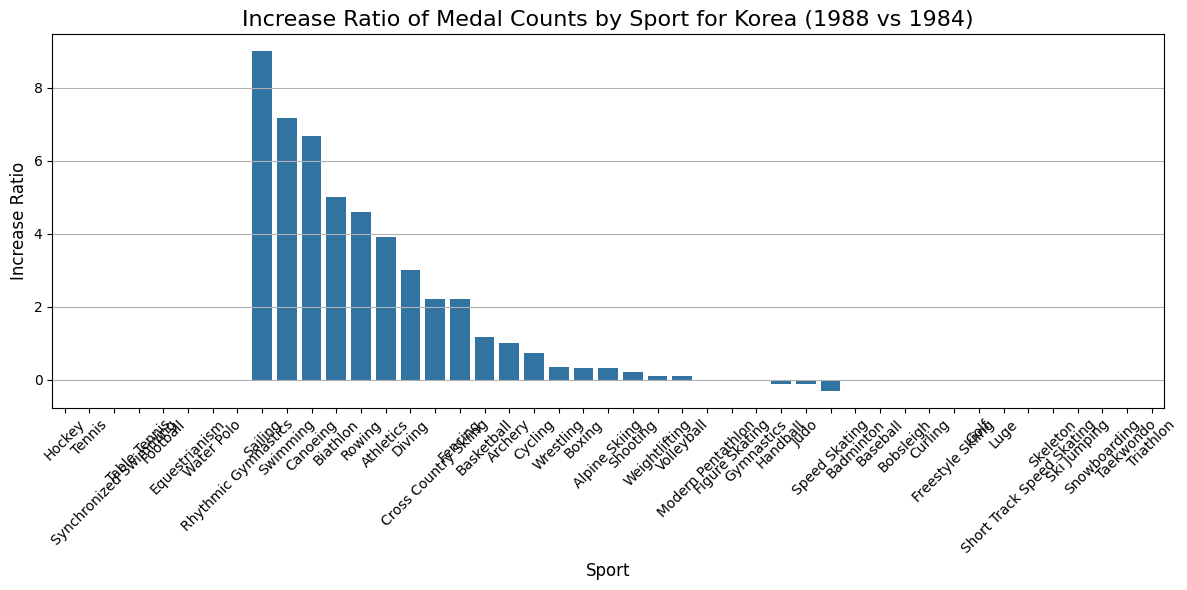

In [117]:
# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='Sport', y='Increase Ratio', data=increase_ratio_sorted)

# 그래프 제목 및 레이블 설정
plt.title('Increase Ratio of Medal Counts by Sport for Korea (1988 vs 1984)', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Increase Ratio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# 그래프 출력
plt.tight_layout()
plt.show()


In [118]:
# Sailing 종목 메달 수 필터링
sailing_data = korea_medals[korea_medals['Sport'] == 'Sailing']

# 연도별 메달 수 계산
sailing_medals_by_year = sailing_data.groupby('Year').size()

# 결과 출력
print(sailing_medals_by_year)


Year
1984     1
1988    10
1992     3
1996     5
2000     5
2004     4
2008     4
2012     4
2016     4
dtype: int64


In [119]:
# Sailing 종목 참가자 수 필터링
sailing_participants = korea_data[korea_data['Sport'] == 'Sailing']

# 연도별 참가자 수 계산
sailing_participants_by_year = sailing_participants.groupby('Year').size()

# 결과 출력
print(sailing_participants_by_year)


Year
1984     1
1988    10
1992     3
1996     5
2000     5
2004     4
2008     4
2012     4
2016     4
dtype: int64


In [120]:
# Sailing 종목에서 메달을 획득한 국가 수
sailing_competitors = athlete_events[athlete_events['Sport'] == 'Sailing']
sailing_competitors_count = sailing_competitors.groupby('Year')['NOC'].nunique()

# 결과 출력
print(sailing_competitors_count)


Year
1900     6
1908     5
1912     6
1920     6
1924    19
1928    23
1932    11
1936    26
1948    23
1952    29
1956    28
1960    46
1964    40
1968    41
1972    42
1976    40
1980    23
1984    60
1988    60
1992    68
1996    78
2000    69
2004    61
2008    62
2012    63
2016    66
Name: NOC, dtype: int64


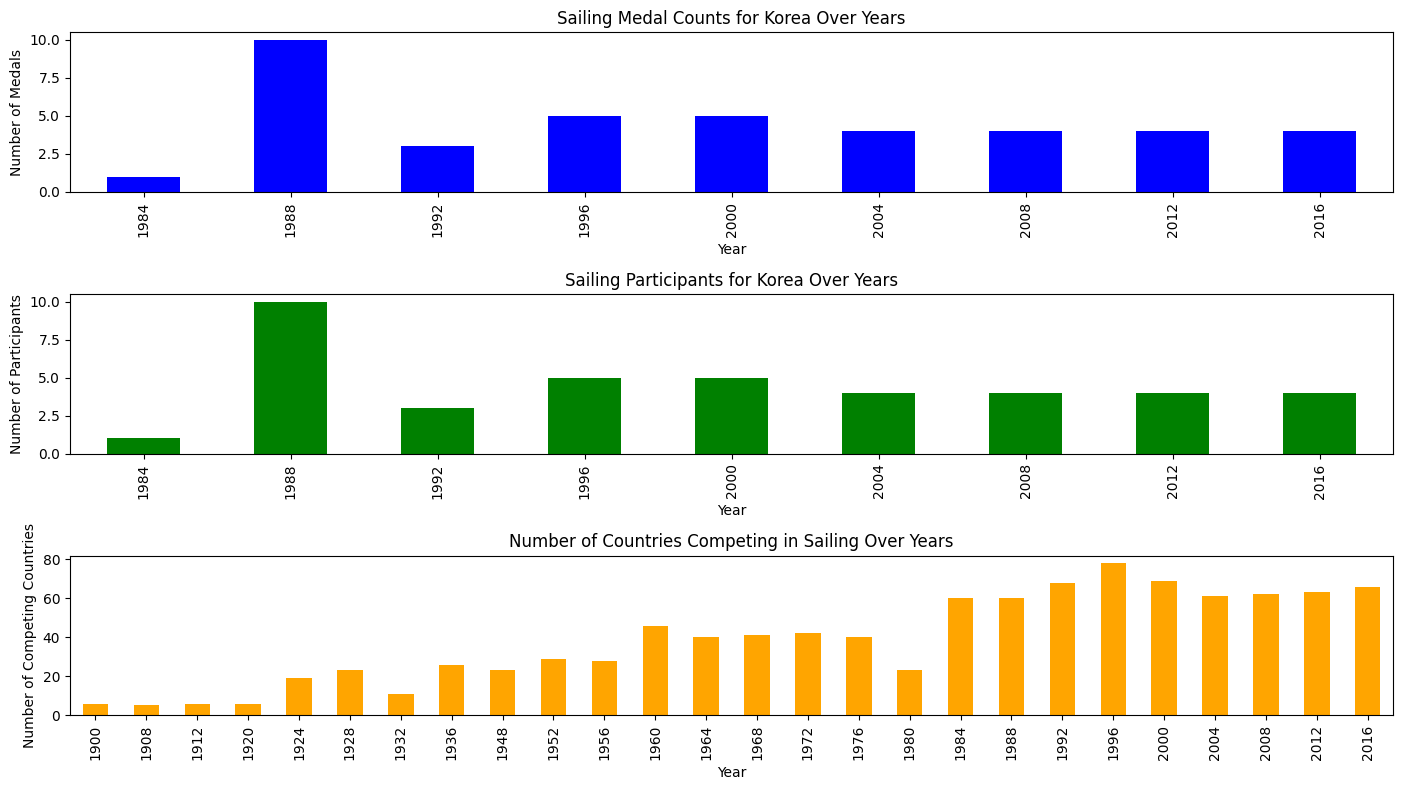

In [121]:
# 시각화
plt.figure(figsize=(14, 8))

# Sailing 메달 수 시각화
plt.subplot(3, 1, 1)
sailing_medals_by_year.plot(kind='bar', color='blue')
plt.title('Sailing Medal Counts for Korea Over Years')
plt.ylabel('Number of Medals')

# Sailing 참가자 수 시각화
plt.subplot(3, 1, 2)
sailing_participants_by_year.plot(kind='bar', color='green')
plt.title('Sailing Participants for Korea Over Years')
plt.ylabel('Number of Participants')

# Sailing 경쟁 수준 시각화
plt.subplot(3, 1, 3)
sailing_competitors_count.plot(kind='bar', color='orange')
plt.title('Number of Countries Competing in Sailing Over Years')
plt.ylabel('Number of Competing Countries')

plt.tight_layout()
plt.show()
